<a href="https://colab.research.google.com/github/azavalac/SFH_dwarf_galaxies/blob/main/ProyectoModulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#instalamos artpop
!pip install artpop

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 975.6 kB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(112)

/root/.artpop/mist. To change this location, create a MIST_PATH environment variable.


BLOQUE CON LA FUNCION QUE DEVUELVE UN CSP A PARTIR DE 2 LISTAS CON EDADES Y SFR

In [3]:
#BLOQUE CON LA FUNCION QUE DEVUELVE UN CSP A PARTIR DE 2 LISTAS CON EDADES Y SFR

#sfh_to_ssp: list x list -> csp
#
#
def shf_to_csp(r, t):
  array_ssp = []

  for i in range(r.shape):
    edad = t
    sfr = r
    #print(edad)
    #print("edad en log age: ", np.log10(edad))
    #print("sfr: ", sfr)

    ssp = artpop.MISTSSP(
      log_age = np.log10(edad), # log of age in years
      num_stars = sfr,      # number of stars
      feh = -1,             # metallicity [Fe/H]
      phot_system = 'LSST', # photometric system(s)
      random_state = rng,   # random state for reproducibility
    )

    array_ssp.append(ssp)

  csp = array_ssp[0]

  for i in range(1, len(array_ssp)):
    csp = csp + array_ssp[i]

  return csp

sfh_test = np.array([[1e8, 2e9, 7e9], [2e5, 1e3, 2e2]]) #edades en Gyr x SFR

In [4]:
#voy a tener esto aqui por mientras, para que me plotee el histograma (despues lo sacamos)
sfh_test = np.array([[1e8, 2e9, 7e9], [2e5, 1e3, 2e2]]) #edades en Gyr x SFR

def shf_to_csp(sfh):
  array_ssp = []

  for i in range(sfh.shape[1]):
    edad = sfh[0][i]
    sfr = sfh[1][i]
    print(edad)
    print("edad en log age: ", np.log10(edad))
    print("sfr: ", sfr)

    ssp = artpop.MISTSSP(
      log_age = np.log10(edad), # log of age in years
      num_stars = sfr,          # number of stars
      feh = -1,                 # metallicity [Fe/H]
      phot_system = 'LSST',     # photometric system(s)
      random_state = rng,       # random state for reproducibility
    )

    array_ssp.append(ssp)

  csp = array_ssp[0]

  for i in range(1, len(array_ssp)):
    csp = csp + array_ssp[i]

  return csp

shf_to_csp(sfh_test)

INFO:ArtPop Logger:Fetching MIST synthetic photometry grid for LSST.


100000000.0
edad en log age:  8.0
sfr:  200000.0
INFO: Fetching MIST synthetic photometry grid for LSST.


INFO:ArtPop Logger:Extracting grid from MIST_v1.2_vvcrit0.4_LSST.txz.


INFO: Extracting grid from MIST_v1.2_vvcrit0.4_LSST.txz.
2000000000.0
edad en log age:  9.301029995663981
sfr:  1000.0
7000000000.0
edad en log age:  9.845098040014257
sfr:  200.0


Composite Population
--------------------
N_pops = 3
M_star = 1.02e+05 M_sun
number fractions = ['99.40%', '0.50%', '0.10%']
mass fractions = ['99.48%', '0.44%', '0.08%']
log(age/yr) = [8.0, 9.301029995663981, 9.845098040014257]
[Fe/H] = [-1, -1, -1]
photometric system = LSST

In [6]:
#sfh_test = np.array([[1e8, 2e9, 7e9], [2e5, 1e3, 2e2]]) #edades en Gyr x SFR
t= [1e8, 2e9, 7e9]
r = [2e5, 1e3, 2e2]

csp = shf_to_csp(r, t)

TypeError: shf_to_csp() takes 1 positional argument but 2 were given

In [7]:
def create_csp(array_ages, array_sfr):
   csp = 0

   for i in range(len(array_ages)):
        # crear población con array_ages[i] y array_sfr[i]
        age = array_ages[i]
        sfr = array_sfr[i]
        # añadirla al conjunto de poblaciones csp
        #falta esto
   return csp

#ejemplo
ages = np.log10(np.array([1e8, 2e9, 7e9]))  # Edades en log10 años
sfr = np.array([2e5, 1e6, 2e4])
csp_result = create_csp(ages, sfr)

**SFH**

100000000.0
edad en log age:  8.0
sfr:  200000.0
2000000000.0
edad en log age:  9.301029995663981
sfr:  1000.0
7000000000.0
edad en log age:  9.845098040014257
sfr:  200.0


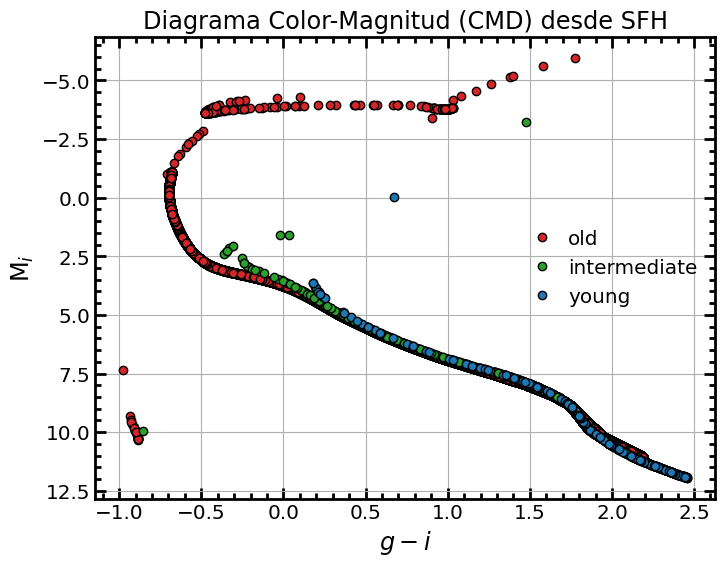

In [8]:
def plot_cmd_from_sfh(sfh): # Funcion que plotea el CMD dado un SFH
    """
    Genera y grafica el CMD a partir de una SFH, mostrando poblaciones antiguas, intermedias y jóvenes.
    """
    # Generar la población estelar compuesta (CSP) a partir del SFH
    csp = shf_to_csp(sfh)

    # Obtener magnitudes en las bandas i y g del sistema LSST
    i_mags = csp.star_mags('LSST_i')
    g_mags = csp.star_mags('LSST_g')

    # Definir etiquetas para clasificar las estrellas según la edad
    old = csp.ssp_labels == 1       # Población antigua
    med = csp.ssp_labels == 2       # Población intermedia
    young = csp.ssp_labels == 3     # Población joven

    # Crear el gráfico del CMD
    plt.figure(figsize=(8, 6))
    plt.plot(g_mags[old] - i_mags[old], i_mags[old], 'o', c='tab:red', mec='k', label='old')
    plt.plot(g_mags[med] - i_mags[med], i_mags[med], 'o', c='tab:green', mec='k', label='intermediate')
    plt.plot(g_mags[young] - i_mags[young], i_mags[young], 'o', c='tab:blue', mec='k', label='young')

    # Configurar etiquetas y formato del gráfico
    plt.legend(loc='center right')
    plt.minorticks_on()
    plt.gca().invert_yaxis()  # Invertir el eje Y para magnitudes
    plt.xlabel(r'$g - i$')
    plt.ylabel(r'M$_i$')
    plt.title('Diagrama Color-Magnitud (CMD) desde SFH')
    plt.grid(True)
    plt.show()

# Llamar a la función con sfh_test
plot_cmd_from_sfh(sfh_test)

100000000.0
edad en log age:  8.0
sfr:  200000.0
2000000000.0
edad en log age:  9.301029995663981
sfr:  1000.0
7000000000.0
edad en log age:  9.845098040014257
sfr:  200.0


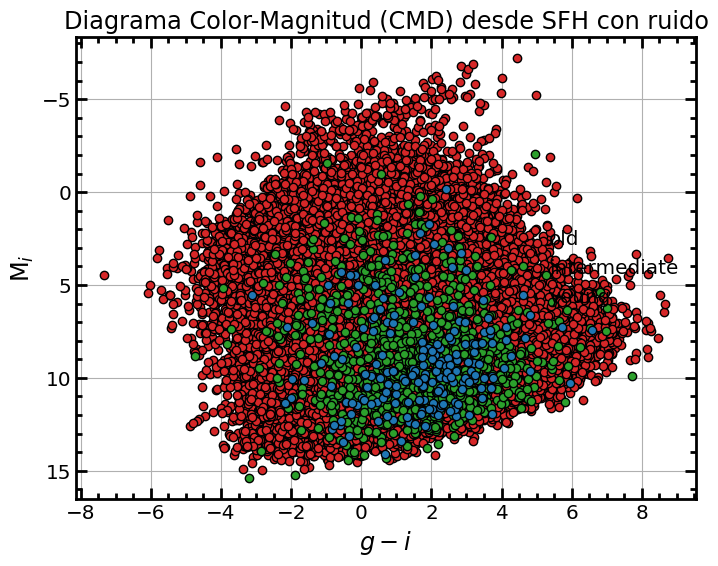

In [9]:
def calcular_error_magnitud(F): #por arreglar
    return 1.09 / np.sqrt(F)

def plot_cmd_from_sfh(sfh): # Genera y grafica el CMD a partir de una SFH, mostrando poblaciones antiguas, intermedias y jóvenes, incluyendo ruido en las magnitudes.

    # Generar la población estelar compuesta (CSP) a partir del SFH
    csp = shf_to_csp(sfh)

    # Obtener magnitudes en las bandas i y g del sistema LSST
    i_mags = csp.star_mags('LSST_i')
    g_mags = csp.star_mags('LSST_g')

    # Suponemos que el flujo es proporcional a la magnitud en cada banda
    flujo_i = 10 ** (-0.0005 * i_mags)  # Convertir magnitudes a flujos aproximados para calcular el error
    flujo_g = 10 ** (-0.0005 * g_mags)  #HAY QUE VARIAR ESTO PARA QUE NO SE VEA ASI

    # Calcular el ruido en magnitudes
    i_noise = calcular_error_magnitud(flujo_i) * np.random.normal(0, 1, len(i_mags))
    g_noise = calcular_error_magnitud(flujo_g) * np.random.normal(0, 1, len(g_mags))

    # Agregar el ruido a las magnitudes
    i_mags_noisy = i_mags + i_noise
    g_mags_noisy = g_mags + g_noise

    # Definir etiquetas para clasificar las estrellas según la edad
    old = csp.ssp_labels == 1       # Población antigua
    med = csp.ssp_labels == 2       # Población intermedia
    young = csp.ssp_labels == 3     # Población joven

    # Crear el gráfico del CMD con ruido agregado
    plt.figure(figsize=(8, 6))
    plt.plot(g_mags_noisy[old] - i_mags_noisy[old], i_mags_noisy[old], 'o', c='tab:red', mec='k', label='old')
    plt.plot(g_mags_noisy[med] - i_mags_noisy[med], i_mags_noisy[med], 'o', c='tab:green', mec='k', label='intermediate')
    plt.plot(g_mags_noisy[young] - i_mags_noisy[young], i_mags_noisy[young], 'o', c='tab:blue', mec='k', label='young')

    # Configurar etiquetas y formato del gráfico
    plt.legend(loc='center right')
    plt.minorticks_on()
    plt.gca().invert_yaxis()  # Invertir el eje Y para magnitudes
    plt.xlabel(r'$g - i$')
    plt.ylabel(r'M$_i$')
    plt.title('Diagrama Color-Magnitud (CMD) desde SFH con ruido')
    plt.grid(True)
    plt.show()

plot_cmd_from_sfh(sfh_test)

Histograma 2D (revisar si está bien)

100000000.0
edad en log age:  8.0
sfr:  200000.0
2000000000.0
edad en log age:  9.301029995663981
sfr:  1000.0
7000000000.0
edad en log age:  9.845098040014257
sfr:  200.0


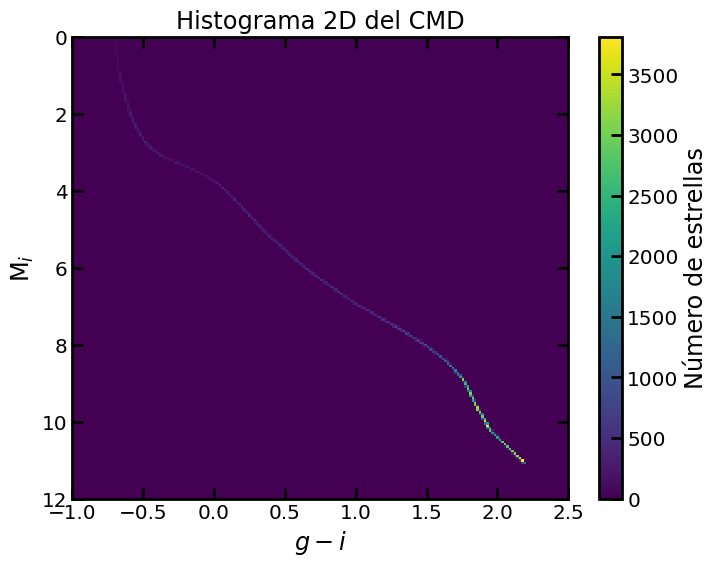

In [22]:
def plot_cmd_histogram_from_sfh(sfh): # Genera y grafica el histograma 2D del CMD a partir de una SFH.

    # Generar la población estelar compuesta (CSP) a partir del SFH
    csp = shf_to_csp(sfh)

    # Obtener magnitudes en las bandas i y g del sistema LSST
    i_mags = csp.star_mags('LSST_i')
    g_mags = csp.star_mags('LSST_g')

    # Calcular el color (g - i)
    color_g_i = g_mags - i_mags

    # Rango fijo para el histograma
    color_range = (-1.0, 2.5)  # Rango de color (g - i)
    mag_range = (0, 12)        # Rango de magnitud i

    # Crear el histograma 2D
    plt.figure(figsize=(8, 6))
    plt.hist2d(color_g_i, i_mags, bins=200, range=[color_range, mag_range], cmap='viridis')

    # Configurar etiquetas y formato del gráfico
    plt.colorbar(label='Número de estrellas')
    plt.gca().invert_yaxis()  # Invertir el eje Y para magnitudes
    plt.xlabel(r'$g - i$')
    plt.ylabel(r'M$_i$')
    plt.title('Histograma 2D del CMD')
    plt.grid(False)
    plt.show()

plot_cmd_histogram_from_sfh(sfh_test)

Grilla (revisar si esta bien)


100000000.0
edad en log age:  8.0
sfr:  200000.0
2000000000.0
edad en log age:  9.301029995663981
sfr:  1000.0
7000000000.0
edad en log age:  9.845098040014257
sfr:  200.0


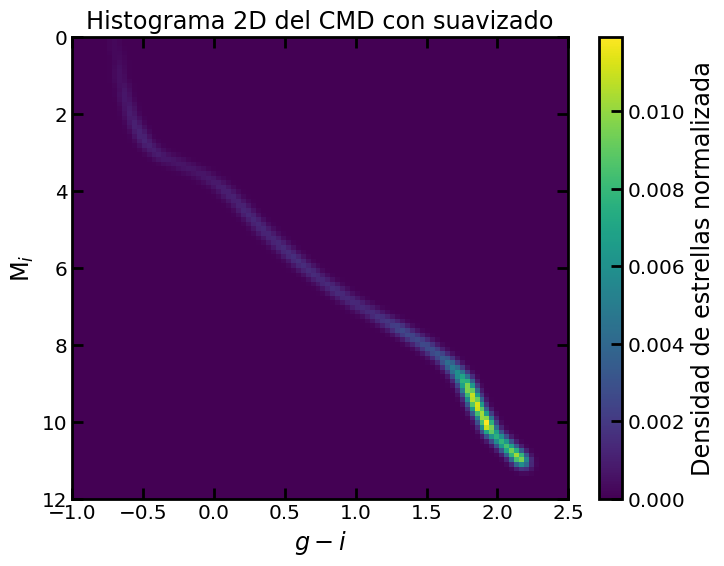

In [23]:
from scipy.ndimage import gaussian_filter

def Grilla_de_SFH(sfh): # Genera y grafica el histograma 2D normalizado y suavizado del CMD a partir de una SFH.

    # Generar la población estelar compuesta (CSP) a partir del SFH
    csp = shf_to_csp(sfh)

    # Obtener magnitudes en las bandas i y g del sistema LSST
    i_mags = csp.star_mags('LSST_i')
    g_mags = csp.star_mags('LSST_g')

    # Calcular el color (g - i)
    color_g_i = g_mags - i_mags

    # Rango fijo para el histograma
    color_range = (-1.0, 2.5)  # Rango de color (g - i)
    mag_range = (0, 12)        # Rango de magnitud i

    # Crear el histograma 2D
    hist, xedges, yedges = np.histogram2d(color_g_i, i_mags, bins=100, range=[color_range, mag_range])

    # Normalizar el histograma
    hist_normalized = hist / hist.sum()

    # Aplicar un filtro Gaussiano para suavizar
    hist_smoothed = gaussian_filter(hist_normalized, sigma=1)  # Puedes ajustar sigma según el nivel de suavizado deseado

    # Graficar el histograma 2D suavizado
    plt.figure(figsize=(8, 6))
    plt.imshow(hist_smoothed.T, extent=[color_range[0], color_range[1], mag_range[0], mag_range[1]],
               origin='lower', aspect='auto', cmap='viridis')

    # Configurar etiquetas y formato del gráfico
    plt.colorbar(label='Densidad de estrellas normalizada')
    plt.gca().invert_yaxis()  # Invertir el eje Y para magnitudes
    plt.xlabel(r'$g - i$')
    plt.ylabel(r'M$_i$')
    plt.title('Histograma 2D del CMD con suavizado')
    plt.grid(False)
    plt.show()

Grilla_de_SFH(sfh_test)

Creación de SFH (Danilo)

[100000.          98090.72864089  45658.95443907      0.
      0.              0.              0.              0.
  15631.6369938   44775.40565738      0.        ]
[1.0000e-03 1.4010e+00 2.8010e+00 4.2010e+00 5.6010e+00 7.0010e+00
 8.4010e+00 9.8010e+00 1.1201e+01 1.2601e+01 1.4001e+01]


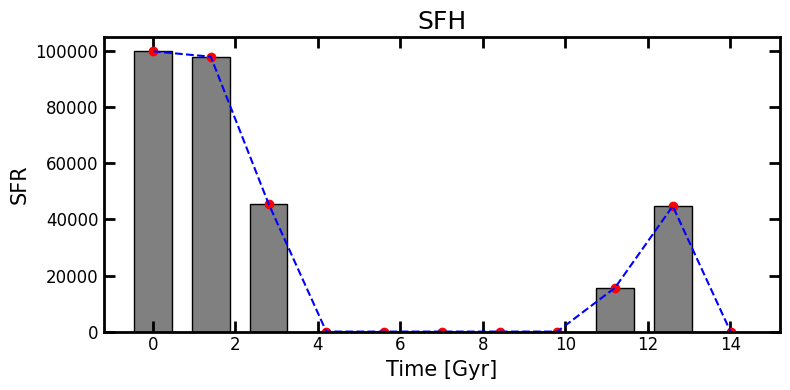

In [12]:
#funcion original con modificaciones correctas

import numpy as np
import matplotlib.pyplot as plt

def create_sfh(n_points, n_stars, H_noise=30):
    #n_stars es el numero final de estrellas q podriamos formar
    # Randomize amplitude and phase
    rho = np.random.rand(H_noise) * np.logspace(0.5, -2.5, H_noise)
    phi = np.random.rand(H_noise) * 2 * np.pi

    # Accumulate r(t) over t = [0, 2*pi]
    t = np.linspace(0, np.pi, n_points+1)
    r = np.ones_like(t)
    for h in range(1, H_noise + 1):
        r += rho[h - 1] * np.sin(h * t + phi[h - 1])

    # Update t to go from 0 to 14.
    t = 1e-3+t*14 / np.pi

    # Update r to go from 0 to 1
    r_mask = r < 0.6 # Esto es para tener regiones sin formación. Este parámetro se puede variar

    r = r/r.max()
    r[r_mask] = 0
    r *= n_stars / n_points

    return r, t



def display_sfh(r, t):
    plt.figure(figsize=(8, 4))
    plt.title('SFH', fontsize=18)

    plt.bar(t, r, color='grey', width=10/len(t), edgecolor='black')
    plt.plot(t, r, 'ro')
    plt.plot(t, r, '--b')
    plt.xlabel('Time [Gyr]', fontsize=15)
    plt.ylabel('SFR', fontsize=15)

    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    plt.show()

r, t = create_sfh(10,1e6, 100)
print(r)
print(t)
display_sfh(r, t)

Prueba de create_SFH, probamos distintos valores para H_noise

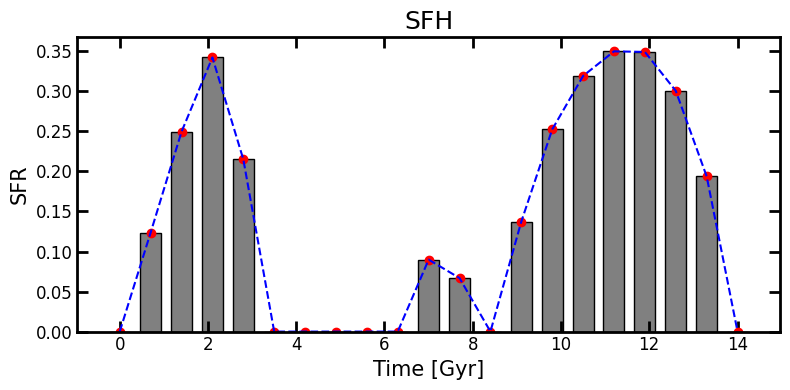

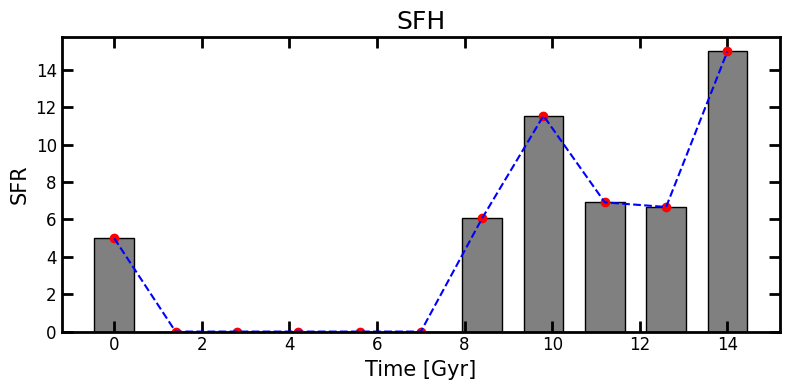

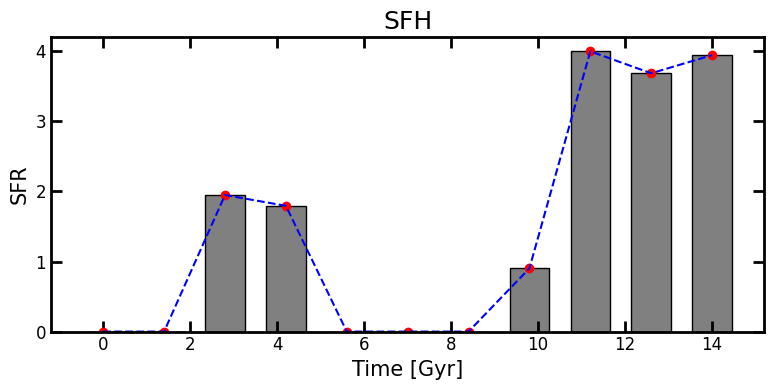

In [14]:
r, t = create_sfh(20, 7) # Probamos con un r=20 para tener mas puntos y t=7 el cual da pertubaciones mas suaves
display_sfh(r, t)

r, t = create_sfh(10, 150) # Probamos t=150 el cual da pertubaciones mas grandes
display_sfh(r, t)

r, t = create_sfh(10, 40) # Probamos t=1 el cual da pertubaciones mas pequeñas
display_sfh(r, t)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Definir el modelo de red neuronal
def create_sfh_model(input_shape):
    model = Sequential()
    # Primera capa LSTM para capturar patrones secuenciales de SFH
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    # Segunda capa LSTM
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.2))
    # Capa densa final para la salida (ajustar el número de neuronas según el formato de salida deseado)
    model.add(Dense(1, activation='linear'))  # salida continua
    return model

# Crear el modelo con la forma de entrada adecuada (número de pasos de tiempo y características)
input_shape = (timesteps, features)  # Especifica `timesteps` y `features` según tu estructura de datos
model = create_sfh_model(input_shape)

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenamiento del modelo (usar tus datos de entrada `X_train` y salida `y_train`)
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


NameError: name 'timesteps' is not defined